In [3]:
import pandas as pd
import pandas_datareader as web
import numpy as np
import matplotlib.pyplot as plt

In [40]:
# set vars
symbols = ["^GSPC", "GLD", "BND", "VTI", "VGT", "VOO", "VWO"]
start_date = '01/01/2010'
end_date = '01/01/2021'
interval = 'm'
start_balance = 1000


In [42]:
# get data
data = web.get_data_yahoo(symbols, start_date, end_date, interval = interval)['Adj Close'].pct_change()
cor_matrix = data.corr()
# print(cor_matrix)
portfolio_balance = pd.DataFrame()

for symbol in symbols:
    portfolio_balance[symbol] = start_balance + np.cumsum(start_balance * (data[symbol]))

# print(portfolio_balance)

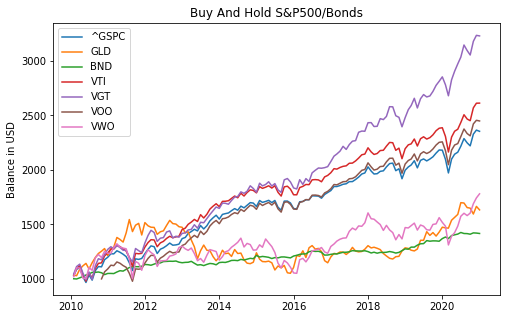

In [43]:
# Plot graph
plt.figure(figsize=(8,5))
for item in portfolio_balance:
    portfolio_balance[item]
    plt.plot(portfolio_balance[item], label=item)
plt.title("Buy And Hold S&P500/Bonds")
plt.ylabel('Balance in USD')
plt.legend()
plt.show()